# Used Car Price Prediction 

This Dataset contains total 12 features
- Name      
- Location  
- Year
- Kilometers_Driven
- Fuel_Type
- Transmission
- Owner_Type
- Mileage
- Engine
- Power
- Seats
- Price

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv("train-data.csv")

In [5]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Total No of records and features 

In [6]:
df.shape

(6019, 14)

## Drop Unwanted Columns

In [7]:
df.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)

In [8]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


## Check Null values

In [9]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

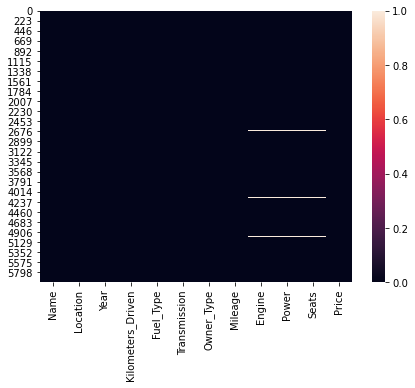

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull())
plt.show()

## Data Cleaning and Correction of all Features 

## 1. Location 

In [11]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

### conclusion:
* As seen here there ara total 11 location

## 2. Fuel Type

In [12]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

### LPG and Electric Cars

In [13]:
df[(df['Fuel_Type']=='Electric') | (df['Fuel_Type']=='LPG')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.45
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,1.65
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.10
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.0,2.85
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.20
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.95
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [14]:
i =df[(df['Fuel_Type']=='LPG') | (df['Fuel_Type']=='Electric')].index
df.drop(i,axis=0,inplace=True)

## conclusion:
* There are very very less car with LPG and Electric as fuel system so we can drop it

## 3. Transmission

In [15]:
df['Transmission'].value_counts()

Manual       4289
Automatic    1718
Name: Transmission, dtype: int64

### conclusion:
* There are 2 types of Transmission system in automobile (ie manual and automatic)

## 4. Owner Type

In [16]:
df['Owner_Type'].value_counts()

First             4919
Second             966
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [17]:
i = df[df['Owner_Type']=='Fourth & Above'].index
df.drop(i,axis=0,inplace=True)

### conclusion:
* Fourth & Above category is very very less so we drop it

## 5. Seats

In [18]:
df['Seats'].value_counts()

5.0     4998
7.0      672
8.0      132
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [19]:
df[df['Seats']>8]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,3.50
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,5.25
1347,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,9.0,4.10
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,3.65
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0 kmpl,2446 CC,null bhp,10.0,3.50
2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58 kmpl,2499 CC,78 bhp,9.0,4.75
2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,9.0,4.50
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,5.50


In [20]:
df['Seats']=np.where(df['Seats']>8,6,df['Seats'])

In [21]:
df.drop(df[df['Seats']==0].index,axis=0,inplace=True)

In [22]:
df['Seats'].value_counts()

5.0    4998
7.0     672
8.0     132
4.0      99
6.0      39
2.0      16
Name: Seats, dtype: int64

### conclusion:
* 10 setaers and 0 seats sedan cars are not availables in realife 
* so we can replace 10 setaers with mode of seats lets say 6 

## 6. Name

In [23]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Mahindra Scorpio S10 AT 4WD             1
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1862, dtype: int64

In [24]:
df['Name'].nunique()

1862

### Features spliting  (Car & Model)

In [25]:
df['Model']=df['Name'].map(lambda x: str(x).strip().split(" ")[1])

In [26]:
df['Name']=df['Name'].map(lambda x: str(x).strip().split(" ")[0])

In [27]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Wagon


In [28]:
df['Model'].value_counts()

Swift         351
City          270
i20           246
Verna         170
Innova        162
             ... 
XUV300          1
Fortwo          1
Countryman      1
Clubman         1
F               1
Name: Model, Length: 210, dtype: int64

In [29]:
df['Model'].value_counts()[df['Model'].value_counts()<5]

Avventura     4
V40           4
Hexa          4
R-Class       4
Tucson        4
             ..
XUV300        1
Fortwo        1
Countryman    1
Clubman       1
F             1
Name: Model, Length: 75, dtype: int64

### conclusion:
* As seen here there are total 1862 types of cars which is very high
* we have make seperate features for car model and car manufactures ie(Name) by feature spliting

## 7. Year

In [30]:
df['Year'].value_counts()

2014    796
2015    744
2016    740
2013    649
2017    587
2012    575
2011    464
2010    339
2018    298
2009    197
2008    171
2007    122
2019    102
2006     77
2005     56
2004     31
2003     17
2002     15
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

### Covert data types into object
* Year should be in object as its is category not a Numerical Number 

In [31]:
df['Year']=df['Year'].astype(str)

In [32]:
df['Year']=np.where(df['Year'].astype(int)<2003,"less than 2003",df['Year'])

In [33]:
df['Year'].value_counts()

2014              796
2015              744
2016              740
2013              649
2017              587
2012              575
2011              464
2010              339
2018              298
2009              197
2008              171
2007              122
2019              102
2006               77
2005               56
less than 2003     32
2004               31
2003               17
Name: Year, dtype: int64

### conclusion:
* As seen here there are total 22 differents years of car model
* Cars with Years 2000,2001,2002,1998 & 1999 are very very less so we can make sepearte categ of "less than 2003" for all

## 8. Kilometers Driven

In [34]:
df['Kilometers_Driven'].isnull().sum()

0

### Check Data types

In [35]:
df.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Model                 object
dtype: object

## 9. Mileage

In [36]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               35
Power                35
Seats                41
Price                 0
Model                 0
dtype: int64

In [37]:
df['Mileage'].unique

<bound method Series.unique of 0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5997, dtype: object>

In [38]:
df['Mileage']=df['Mileage'].map(lambda x: str(x).strip().split(" ")[0])

In [39]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.0,2.65,Wagon


### Convert data type into float

In [40]:
df['Mileage']=df['Mileage'].astype(float)

### conclusion:
* Data correction of Mileage feature (Numerical feature)
* Then we convert data to float 

## 10. Engine

In [41]:
df['Engine'].unique

<bound method Series.unique of 0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 5997, dtype: object>

### Data correction of Engine by paasing it through function fun()

In [42]:
def fun(x):
    if x == None:
        return x
    elif len(str(x).split(" "))==2:
        return str(x).split(" ")[0]

In [43]:
df['Engine']=df['Engine'].apply(fun)

In [44]:
df['Engine'].isnull().sum()

35

### Convert data type into float

In [45]:
df['Engine']=df['Engine'].astype(float)

### Replace Null values of Engine column by mean base on model

In [46]:
lst = df['Model'].unique()
for i in lst:
    mean_model = df[df["Model"]==i]['Engine'].mean()
    df.update(df[df['Model']==i]['Engine'].fillna(mean_model))

## 11. Power

In [47]:
df['Power'].isnull().sum()

35

In [48]:
df['Power'].unique

<bound method Series.unique of 0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5997, dtype: object>

### Data correction of power by paasing it through function

In [49]:
df['Power']=df['Power'].apply(fun)

In [50]:
df['Power'].unique

<bound method Series.unique of 0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 5997, dtype: object>

In [51]:
df['Power'].isnull().sum()

35

In [52]:
df[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1494.718045,None,NaN,2.95,City
208,Maruti,Kolkata,2010,42001,Petrol,Manual,First,16.10,1240.447368,None,NaN,2.11,Swift
733,Maruti,Chennai,2006,97800,Petrol,Manual,Third,16.10,1240.447368,None,NaN,1.75,Swift
749,Land,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2475.719298,None,NaN,26.50,Rover
1294,Honda,Delhi,2009,55005,Petrol,Manual,First,12.80,1494.718045,None,NaN,3.20,City
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1240.447368,None,NaN,5.80,Swift
1385,Honda,Pune,2004,115000,Petrol,Manual,Second,0.00,1494.718045,None,NaN,1.50,City
1460,Land,Coimbatore,2008,69078,Petrol,Manual,First,0.00,2475.719298,None,NaN,40.88,Rover
2074,Maruti,Pune,2011,24255,Petrol,Manual,First,16.10,1240.447368,None,NaN,3.15,Swift
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1077.044118,None,NaN,1.93,Santro


### Replace Null values of Power column by mean base on model

In [53]:
lst = df['Model'].unique()
for i in lst:
    mean_model = df[df["Model"]==i]['Seats'].mode(0)[0]
    df.update(df[df['Model']==i]['Seats'].fillna(mean_model))

In [54]:
df[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1494.718045,None,5.0,2.95,City
208,Maruti,Kolkata,2010,42001,Petrol,Manual,First,16.10,1240.447368,None,5.0,2.11,Swift
733,Maruti,Chennai,2006,97800,Petrol,Manual,Third,16.10,1240.447368,None,5.0,1.75,Swift
749,Land,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2475.719298,None,5.0,26.50,Rover
1294,Honda,Delhi,2009,55005,Petrol,Manual,First,12.80,1494.718045,None,5.0,3.20,City
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1240.447368,None,5.0,5.80,Swift
1385,Honda,Pune,2004,115000,Petrol,Manual,Second,0.00,1494.718045,None,5.0,1.50,City
1460,Land,Coimbatore,2008,69078,Petrol,Manual,First,0.00,2475.719298,None,5.0,40.88,Rover
2074,Maruti,Pune,2011,24255,Petrol,Manual,First,16.10,1240.447368,None,5.0,3.15,Swift
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1077.044118,None,5.0,1.93,Santro


### Convert data type of power into float

In [55]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

In [56]:
a = df['Model'].unique()
for i in a:
    r = df[df["Model"]==i]['Power'].astype(float).mean()
    df.update(df[df['Model']==i]['Power'].fillna(r))

In [57]:
df.dropna(axis=0,inplace=True)

### Check Null values again

In [58]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
dtype: int64

In [145]:
df.head()

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,8,72000,2,0,58.16,1.75
1,32,10,13,41000,2,1,126.20,12.50
2,29,2,9,46000,2,2,88.70,4.50
3,61,2,10,87000,2,1,88.76,6.00
4,0,3,11,40670,1,1,140.80,17.74


### Check data types

In [60]:
df.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Model                 object
dtype: object

## Conclusion:
* We have done EDA, data cleaning and data conversion of all features
* Now we will visualise all features 
* we will sort out all important features which dominate more to predict output or target feature ie price

# Feature Engineering & Visualization

## Total Cars of all Companies

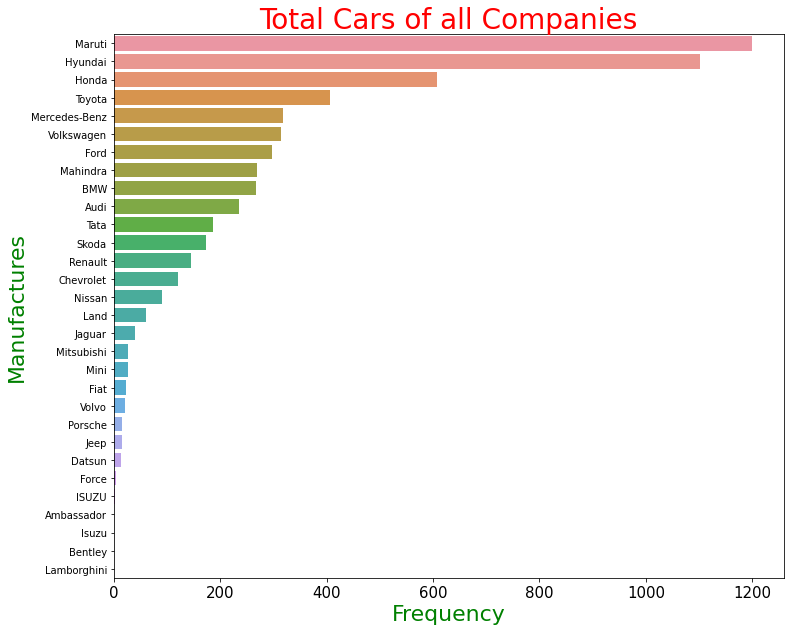

In [61]:
plt.figure(figsize=(12,10))
most_cat = df['Name'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Manufactures",size=22,c="g")
plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

### conclusion :
* As seen Bently, Force, Lamborghini, and Isuzu cars are very very less
* so these will act as outlier we will drop it

In [62]:
df['Name'].value_counts()[df['Name'].value_counts()<5]

Force          3
ISUZU          2
Ambassador     1
Isuzu          1
Bentley        1
Lamborghini    1
Name: Name, dtype: int64

In [63]:
i = df['Name'].value_counts()[df['Name'].value_counts()<5].index
index = df[df['Name'].isin(i)].index
df.drop(index,axis=0,inplace=True)

## Total Cars Location wise

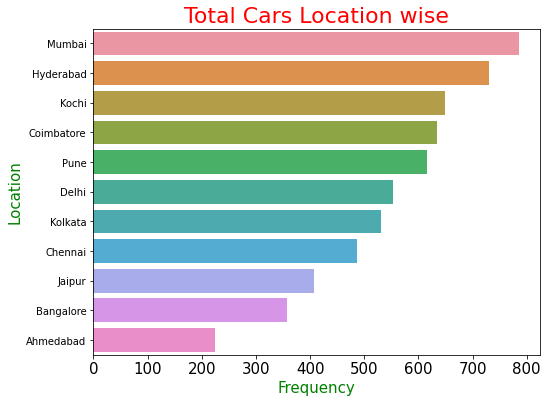

In [64]:
plt.figure(figsize=(8,6))
most_cat = df['Location'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=15,c="g")
plt.title("Total Cars Location wise",size=22,c="r")
plt.show()

### conclusion :
* As seen cars from mumbai hyderbad and Kochi are very high 
* cars from ahmedabad are very less as compared to all
* so we can say that location is some what imp feature

## Price range of differents manufactures

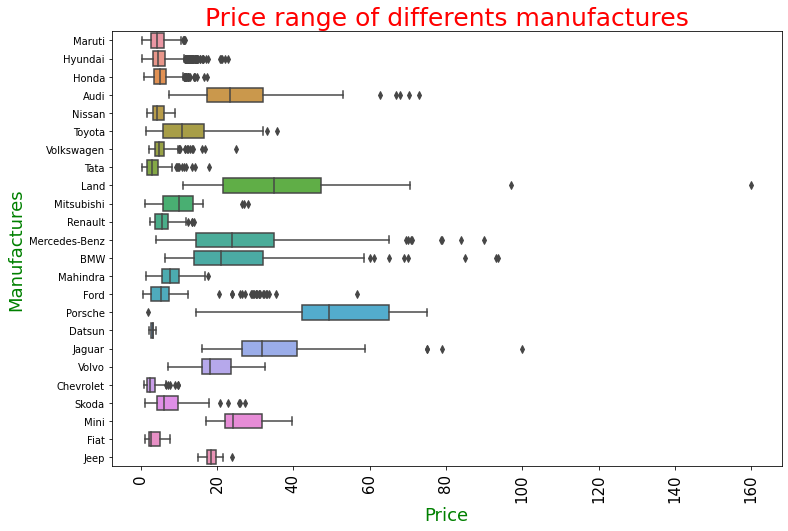

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y="Name",x="Price")
plt.xlabel("Price",size=18,c="g")
plt.ylabel("Manufactures",size=18,c="g")
plt.title("Price range of differents manufactures",size=25,c="r")
plt.xticks(rotation='vertical',size=15)
plt.show()

### conclusion :
* Here clearly we can see that price of cars more depends on its brand 
* range of price is different for differents brand

## All Categ with their Rating

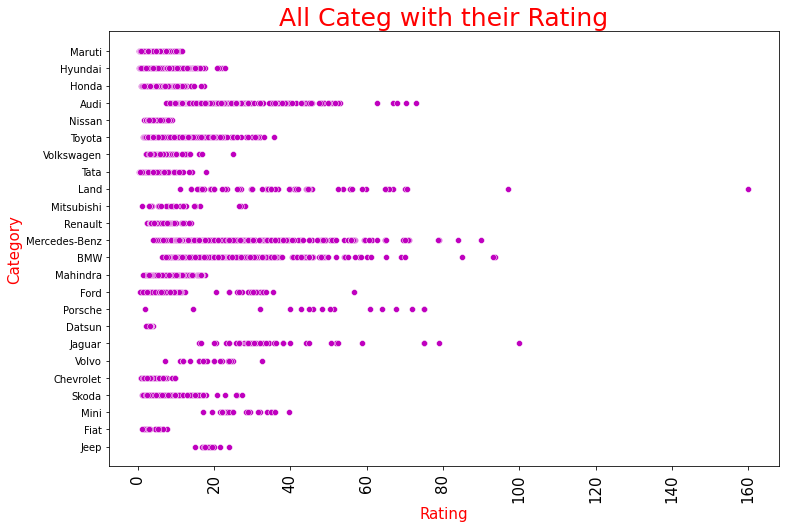

In [66]:
plt.figure(figsize=(12,8)) 
sns.scatterplot(data=df,y="Name",x='Price',color="m")
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Rating",size=15,c="r")
plt.ylabel("Category",size=15,c="r")
plt.title("All Categ with their Rating",size=25,c="red")
plt.show()

## Fuel Types

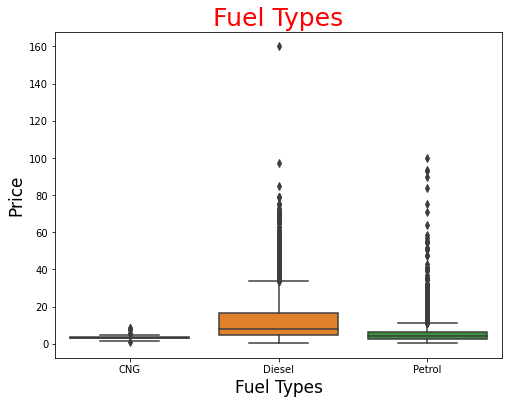

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Fuel_Type",y="Price")
plt.xlabel("Fuel Types",size=17,c="k")
plt.ylabel("Price",size=17,c="k")
plt.title("Fuel Types",size=25,c="red")
plt.show()

### conclusion :
* See Price for different fuel types
* Price of diesel cars are more than petrol 

## Year vs Price

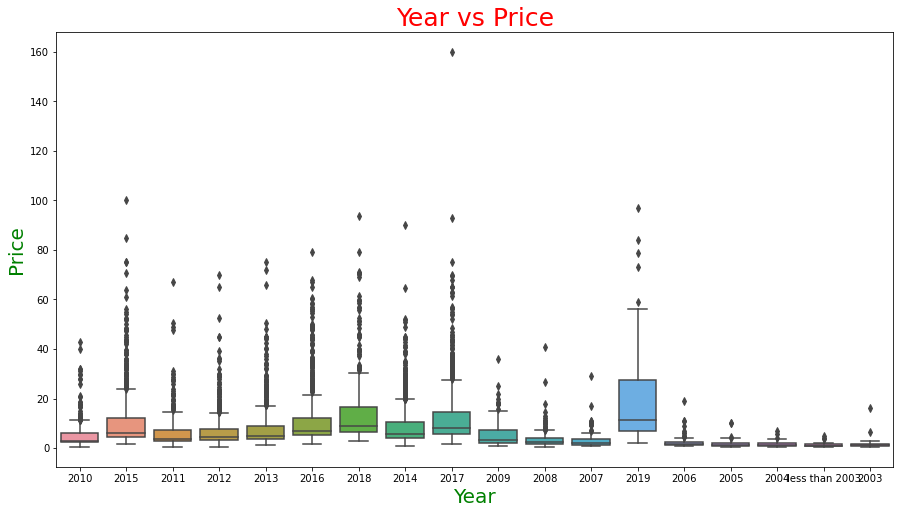

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x="Year",y="Price")
plt.xlabel("Year",size=20,c="g")
plt.ylabel("Price",size=20,c="g")
plt.title("Year vs Price",size=25,c="r")
plt.show()

### conclusion :
* so clearly seen that as car become older its price get reduces 
* Year of car is imp to predict output 

## Frequency of Seats

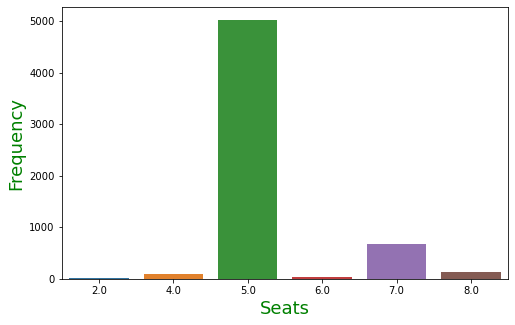

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Seats")
plt.xlabel("Seats",size=18,c="g")
plt.ylabel("Frequency",size=18,c="g")
plt.show()

### conclusion :
* Frequency of 5 seaters cas is very very high as compared to other
* But ites not so imp to predict output

## Total % of Owner

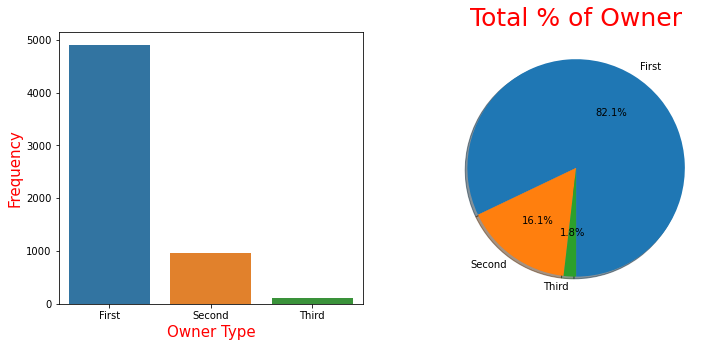

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x="Owner_Type")
plt.xlabel("Owner Type",size=15,c="r")
plt.ylabel("Frequency",size=15,c="r")
plt.subplot(1,2,2)
labels =df['Owner_Type'].value_counts(sort = True).index
sizes = df['Owner_Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Total % of Owner',size = 25,c="r")
plt.show()

### conclusion :
* percentages of 1st Owners is very high ie 82 %

### Get statistical info of Num features

In [71]:
df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,5.865187e+04,18.166691,1619.134961,112.648435,5.274021,9.473658
std,9.148420e+04,4.548538,594.935278,53.187367,0.782620,11.090805
min,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,5.300000e+04,18.160000,1493.000000,93.700000,5.000000,5.650000
75%,7.300000e+04,21.100000,1982.500000,138.100000,5.000000,9.957500
max,6.500000e+06,33.540000,5461.000000,550.000000,8.000000,160.000000


# Handle Outliers

0 Kilometers_Driven
1 Power
2 Mileage
3 Engine


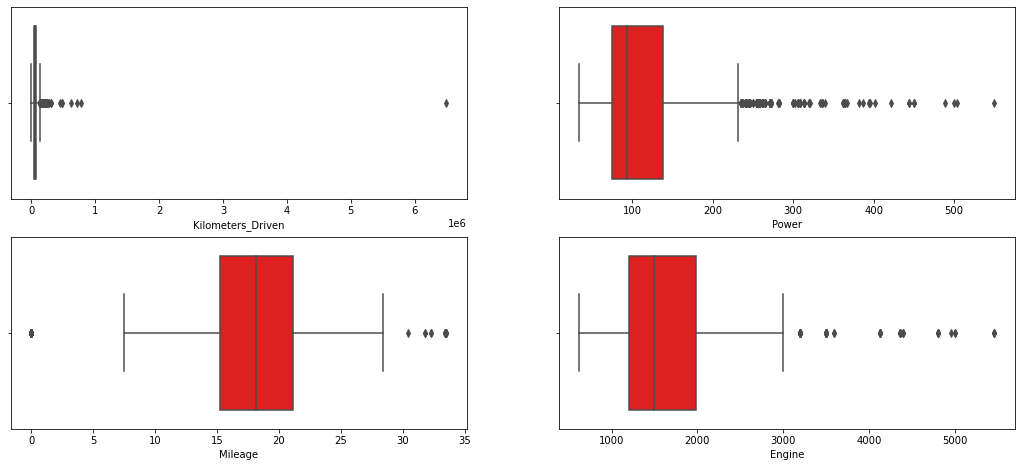

In [72]:
col = ['Kilometers_Driven','Power','Mileage','Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df,color='red')
plt.show()

## Outlier Removal

In [73]:
df.drop(df[df['Kilometers_Driven']>300000].index,inplace=True,axis=0)

In [74]:
#df.drop(df[df['Mileage']<5].index,inplace=True,axis=0)

In [75]:
df.drop(df[df['Power']>480].index,inplace=True,axis=0)

In [76]:
#df.drop(df[df['Engine']>5000].index,inplace=True,axis=0)

## Visualize after removing Major outliers

0 Kilometers_Driven
1 Power
2 Mileage
3 Engine


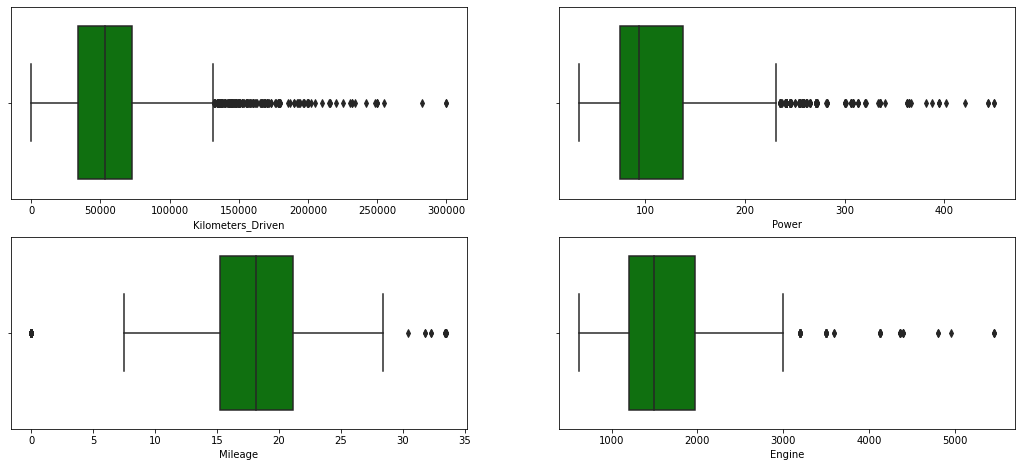

In [77]:
col = ['Kilometers_Driven','Power','Mileage','Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df,color='green')
plt.show()

In [78]:
df.shape

(5963, 13)

## Data distribution of output Price feature

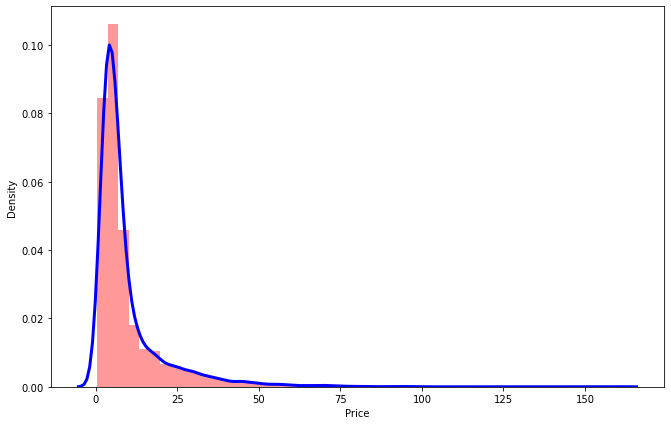

In [79]:
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['Price'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

0 Kilometers_Driven
1 Mileage
2 Engine
3 Price


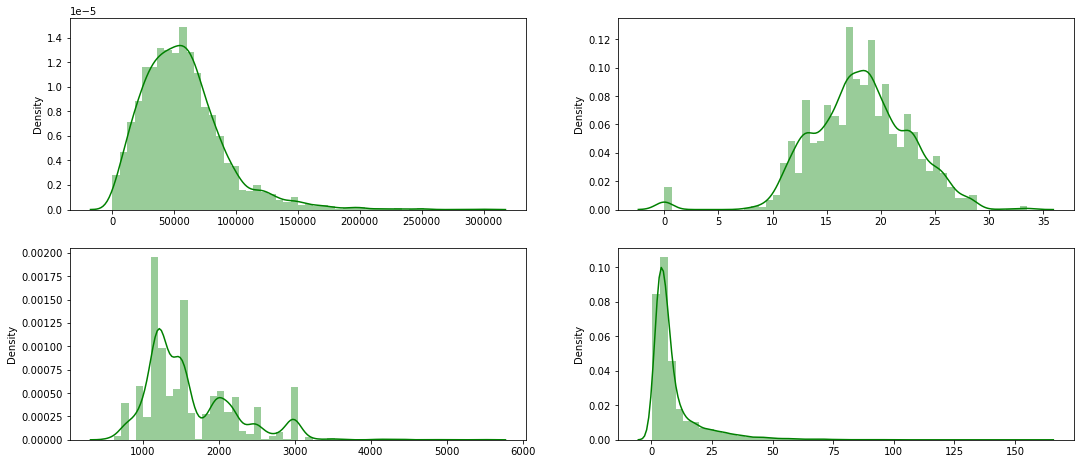

In [80]:
col = ['Kilometers_Driven','Mileage','Engine',"Price"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.distplot(x=df[v],color='g')
plt.show()

## Effect of Fuel type Price 

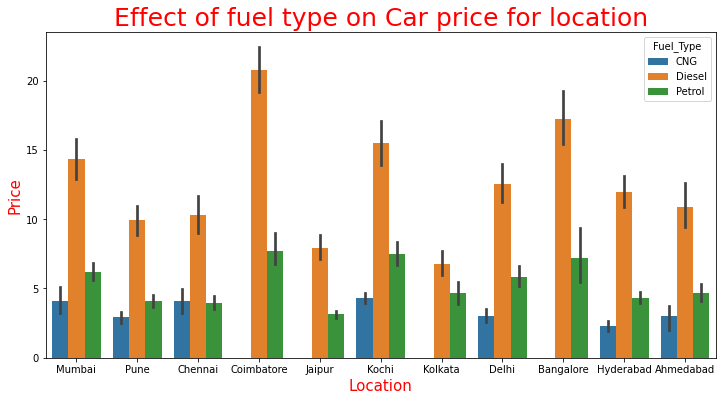

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Price",x='Location',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.title("Effect of fuel type on Car price for location",size=25,c="red")
plt.show()

### conclusion :
* Here clearly we can see that price of Diesel car is more than than petrol irespective of location

## Effect of fuel type on price of differents brands

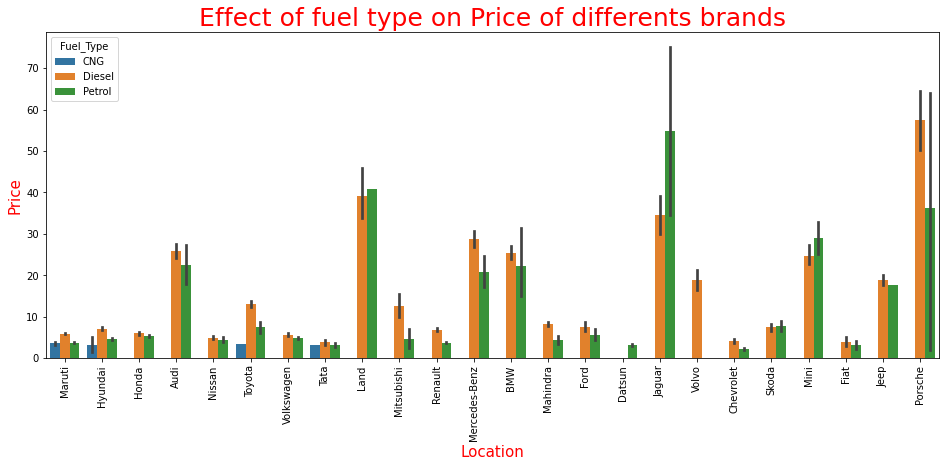

In [82]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,y="Price",x='Name',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.xticks(rotation="vertical",size=10)
plt.title("Effect of fuel type on Price of differents brands",size=25,c="red")
plt.show()

### conclusion :
* Here clearly we can see that price of Diesel car for some brands such as jaguar and BMW is less than petrol

## Scatter Plot

### Scatter Plot to get idea of correlation of some num festures with o/p

0 Kilometers_Driven
1 Mileage
2 Engine
3 Power


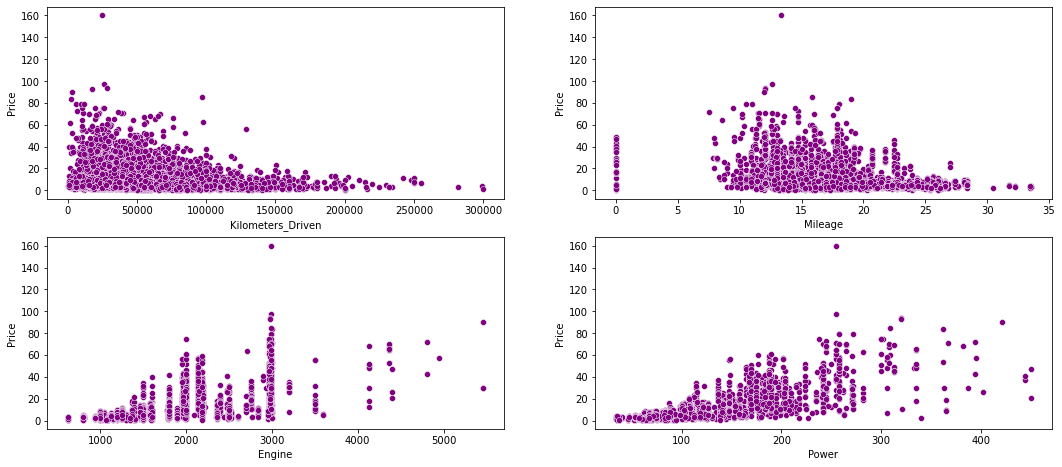

In [83]:
col = ['Kilometers_Driven','Mileage','Engine',"Power"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df[v],y=df['Price'],color='purple')
plt.show()

## Owner relation with Price

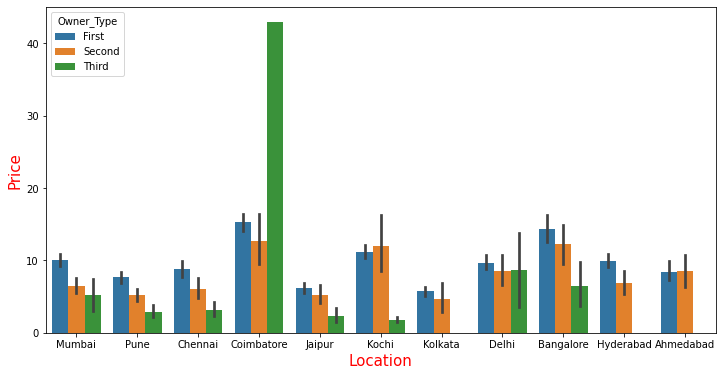

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Price",x='Location',hue='Owner_Type')
plt.xlabel("Location",size=15,c="red")
plt.ylabel("Price",size=15,c="red")
plt.show()

## Transmission System relation with Price

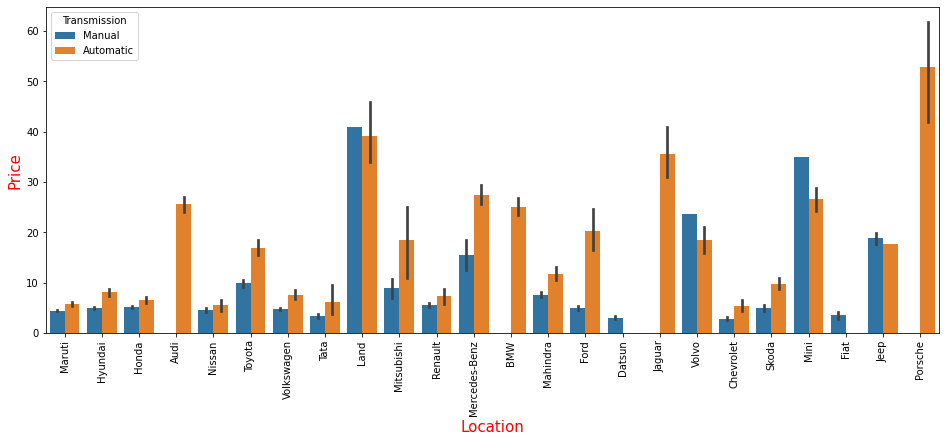

In [85]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,y="Price",x='Name',hue='Transmission')
plt.xlabel("Location",size=15,c="red")
plt.ylabel("Price",size=15,c="red")
plt.xticks(rotation="vertical",size=10)
plt.show()

### conclusion :
* Car with Automatic Transmission system has more price than manual that is OK
* But In real life practise price of car is not highly depends on Transmission system 

# Heatmap 

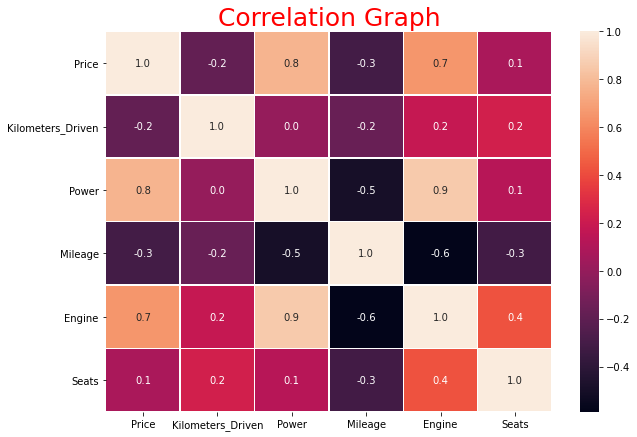

In [86]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["Price","Kilometers_Driven","Power","Mileage","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

### conclusion :
* Here we can see that Engine Power has strong positive realtion with price
* But we can also realise that Engine and Power itself has strong relation So In order to avoid multicolinearity problem we will drop one which has less correlation with o/p
* Power has good relation with price as compared to Engine so we drop Engine 
* Clearly we can say that more Engine CC more Power more the price of car but one power feature is sufficent to get all info

## Drop Features with very less correlation with o/p price

In [87]:
df.drop(['Mileage','Seats','Engine','Transmission'],axis=1,inplace=True)

# Features Construction

### We create single feature by combining Compnay Name and Its model
* so we will have completely new feature of name Car which store info of Car and its model
* Price of car is base not only on its company, its model aslo matter
* If you are buying BMW 2 series and 7 series, company is same but in price there is lots of difference

In [88]:
df['Car'] = df['Name'].astype(str) + " " + df['Model']

In [89]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Power,Price,Model,Car
0,Maruti,Mumbai,2010,72000,CNG,First,58.16,1.75,Wagon,Maruti Wagon
1,Hyundai,Pune,2015,41000,Diesel,First,126.20,12.50,Creta,Hyundai Creta
2,Honda,Chennai,2011,46000,Petrol,First,88.70,4.50,Jazz,Honda Jazz
3,Maruti,Chennai,2012,87000,Diesel,First,88.76,6.00,Ertiga,Maruti Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Second,140.80,17.74,A4,Audi A4
...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,First,74.00,4.75,Swift,Maruti Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,First,71.00,4.00,Xcent,Hyundai Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Second,112.00,2.90,Xylo,Mahindra Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,First,67.10,2.65,Wagon,Maruti Wagon


### Drop unwanted columns 

In [90]:
df.drop(['Name','Model'],axis=1,inplace=True)

In [91]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Power,Price,Car
0,Mumbai,2010,72000,CNG,First,58.16,1.75,Maruti Wagon
1,Pune,2015,41000,Diesel,First,126.20,12.50,Hyundai Creta
2,Chennai,2011,46000,Petrol,First,88.70,4.50,Honda Jazz
3,Chennai,2012,87000,Diesel,First,88.76,6.00,Maruti Ertiga
4,Coimbatore,2013,40670,Diesel,Second,140.80,17.74,Audi A4
...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,First,74.00,4.75,Maruti Swift
6015,Jaipur,2015,100000,Diesel,First,71.00,4.00,Hyundai Xcent
6016,Jaipur,2012,55000,Diesel,Second,112.00,2.90,Mahindra Xylo
6017,Kolkata,2013,46000,Petrol,First,67.10,2.65,Maruti Wagon


In [92]:
df = df[['Car','Location','Year','Kilometers_Driven','Owner_Type','Fuel_Type','Power','Price']]

In [93]:
df

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,Maruti Wagon,Mumbai,2010,72000,First,CNG,58.16,1.75
1,Hyundai Creta,Pune,2015,41000,First,Diesel,126.20,12.50
2,Honda Jazz,Chennai,2011,46000,First,Petrol,88.70,4.50
3,Maruti Ertiga,Chennai,2012,87000,First,Diesel,88.76,6.00
4,Audi A4,Coimbatore,2013,40670,Second,Diesel,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,First,Diesel,74.00,4.75
6015,Hyundai Xcent,Jaipur,2015,100000,First,Diesel,71.00,4.00
6016,Mahindra Xylo,Jaipur,2012,55000,Second,Diesel,112.00,2.90
6017,Maruti Wagon,Kolkata,2013,46000,First,Petrol,67.10,2.65


In [94]:
df['Car'].unique

<bound method Series.unique of 0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
6014      Maruti Swift
6015     Hyundai Xcent
6016     Mahindra Xylo
6017      Maruti Wagon
6018    Chevrolet Beat
Name: Car, Length: 5963, dtype: object>

## See total no of categories of cars

In [95]:
len(df['Car'].value_counts())

200

In [96]:
### see total no of categories of cars with their models

In [97]:
lst = df['Car'].unique()
no_models= []
for i in lst:
    df1=df[df['Car']==i]
    no_models.append(len(df1))

In [98]:
dic = dict(zip(list(lst),no_models))

In [99]:
sort_orders = sorted(dic.items(), key=lambda x: x[1])
for i in sort_orders:
    print(i[0], i[1])

Mini Countryman 1
Mini Clubman 1
Porsche Boxster 1
Mahindra XUV300 1
Volkswagen Beetle 1
Volkswagen Tiguan 1
Nissan Evalia 1
Mitsubishi Montero 1
Tata Venture 1
Toyota Platinum 1
Mercedes-Benz CLS-Class 1
Ford Classic 1
Datsun Redi 1
Ford Mustang 1
Ford Fusion 1
Mercedes-Benz SL-Class 1
Maruti Versa 1
Honda WR-V 1
Mercedes-Benz SLC 2
Audi RS5 2
Renault Lodgy 2
Audi A8 2
Nissan Teana 2
Volvo S80 2
Mitsubishi Cedia 2
Mercedes-Benz GLS 2
Mahindra Renault 2
Mitsubishi Outlander 2
Chevrolet Captiva 2
Fiat Punto 2
Mahindra Logan 2
Chevrolet Tavera 2
Volvo XC90 2
Mitsubishi Lancer 2
BMW Z4 2
Nissan X-Trail 3
Mercedes-Benz C-Class 3
BMW 1 3
Mahindra NuvoSport 3
Jaguar XE 3
Tata Xenon 3
Honda BR-V 3
Renault Captur 3
Maruti S-Cross 3
Audi TT 3
Mercedes-Benz SLK-Class 3
Renault Koleos 3
Toyota Qualis 3
Audi A7 3
Ford Freestyle 3
Maruti Grand 3
Tata Nexon 3
Honda WRV 4
Volvo V40 4
Mahindra Verito 4
Hyundai Tucson 4
Audi A3 4
Tata Hexa 4
Fiat Avventura 4
Ford Aspire 4
Tata Bolt 4
Volkswagen CrossPo

In [100]:
sortedDict = dict( sorted(dic.items(), key=lambda x: x[0].lower()) )
for k,v in sortedDict.items():
    print('{}:{}'.format(k,v))

Audi A3:4
Audi A4:77
Audi A6:49
Audi A7:3
Audi A8:2
Audi Q3:27
Audi Q5:30
Audi Q7:38
Audi RS5:2
Audi TT:3
BMW 1:3
BMW 3:98
BMW 5:68
BMW 6:7
BMW 7:13
BMW X1:32
BMW X3:14
BMW X5:23
BMW X6:6
BMW Z4:2
Chevrolet Aveo:14
Chevrolet Beat:46
Chevrolet Captiva:2
Chevrolet Cruze:18
Chevrolet Enjoy:9
Chevrolet Optra:12
Chevrolet Sail:8
Chevrolet Spark:10
Chevrolet Tavera:2
Datsun GO:6
Datsun Redi:1
Datsun redi-GO:6
Fiat Avventura:4
Fiat Grande:5
Fiat Linea:12
Fiat Punto:2
Ford Aspire:4
Ford Classic:1
Ford Ecosport:53
Ford EcoSport:42
Ford Endeavour:38
Ford Fiesta:40
Ford Figo:101
Ford Freestyle:3
Ford Fusion:1
Ford Ikon:14
Ford Mustang:1
Honda Accord:26
Honda Amaze:106
Honda BR-V:3
Honda Brio:60
Honda BRV:5
Honda City:269
Honda Civic:32
Honda CR-V:27
Honda Jazz:58
Honda Mobilio:16
Honda WR-V:1
Honda WRV:4
Hyundai Accent:18
Hyundai Creta:93
Hyundai Elantra:22
Hyundai Elite:14
Hyundai EON:60
Hyundai Getz:10
Hyundai Grand:152
Hyundai i10:154
Hyundai i20:245
Hyundai Santa:17
Hyundai Santro:75
Hyundai 

* As seee there are 200 cars categories
* so we will drop all categories with very less frequency or counts
* These will really helpful as its reduce computation time and improve machine effectiveness

In [101]:
len(df['Car'].value_counts()[df['Car'].value_counts()<10])

95

In [102]:
df['Car'].value_counts()[df['Car'].value_counts()<10]

Tata Safari          9
Mahindra TUV         9
Chevrolet Enjoy      9
Chevrolet Sail       8
Volkswagen Passat    8
                    ..
Nissan Evalia        1
Mini Countryman      1
Volkswagen Tiguan    1
Volkswagen Beetle    1
Honda WR-V           1
Name: Car, Length: 95, dtype: int64

## Lets drop categ with frequecy less than 10

In [103]:
l = df['Car'].value_counts()[df['Car'].value_counts()<10].index
df[df['Car'].isin(l)]

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
21,Maruti S,Bangalore,2015,55392,Second,Diesel,88.50,8.25
28,Honda WRV,Kochi,2018,37430,First,Petrol,88.70,9.90
49,Mahindra Thar,Jaipur,2012,75800,Second,Diesel,105.00,5.50
58,Nissan X-Trail,Hyderabad,2010,121812,First,Diesel,147.60,7.75
67,Mercedes-Benz C-Class,Coimbatore,2019,15369,First,Diesel,194.00,35.67
...,...,...,...,...,...,...,...,...
5928,Mahindra NuvoSport,Coimbatore,2018,37323,Second,Diesel,100.00,7.29
5982,Tata Hexa,Jaipur,2016,39000,First,Diesel,153.86,13.50
5990,Tata New,Pune,2008,86000,Third,Diesel,138.00,0.60
5999,Tata Bolt,Chennai,2016,10000,First,Petrol,88.70,4.00


In [104]:
df.drop(df[df['Car'].isin(l)].index,inplace=True,axis=0)

In [105]:
df_new = df.copy()

## shape of Data after EDA

In [106]:
df.shape

(5613, 8)

In [107]:
df.dtypes

Car                   object
Location              object
Year                  object
Kilometers_Driven      int64
Owner_Type            object
Fuel_Type             object
Power                float64
Price                float64
dtype: object

In [108]:
df[['Car','Location','Year','Owner_Type','Fuel_Type']].nunique()

Car           105
Location       11
Year           18
Owner_Type      3
Fuel_Type       3
dtype: int64

## conclusion 
### We have consider All important features base on above visualisation and domian knowledge 

In [109]:
df1=df.copy()

## Encoding of Categorical features

In [111]:
from sklearn.preprocessing import LabelEncoder

## Label Encoding on 'Car','Location' and 'Fuel_Type' columns

In [112]:
le = LabelEncoder()

In [113]:
lst = ['Car','Location','Fuel_Type']

In [114]:
for i in lst:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])    

In [115]:
df

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,2010,72000,First,0,58.16,1.75
1,32,10,2015,41000,First,1,126.20,12.50
2,29,2,2011,46000,First,2,88.70,4.50
3,61,2,2012,87000,First,1,88.76,6.00
4,0,3,2013,40670,Second,1,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,65,4,2014,27365,First,1,74.00,4.75
6015,41,6,2015,100000,First,1,71.00,4.00
6016,52,6,2012,55000,Second,1,112.00,2.90
6017,67,8,2013,46000,First,2,67.10,2.65


## Ordinal Encoding on 'Owner_Type' and 'Year'

In [116]:
df['Owner_Type'].value_counts()

First     4612
Second     900
Third      101
Name: Owner_Type, dtype: int64

In [117]:
dic = {'First':2,'Second':1,'Third':0}

In [118]:
df['Year'].value_counts()

2014              754
2015              704
2016              700
2013              607
2012              556
2017              535
2011              434
2010              316
2018              268
2009              187
2008              161
2007              113
2019               87
2006               74
2005               53
2004               27
less than 2003     26
2003               11
Name: Year, dtype: int64

In [119]:
dic1 = {'2019':17,"2018":16,"2017":15,"2016":14,"2015":13,"2014":12,"2013":11,"2012":10,"2011":9,"2010":8,"2009":7,"2008":6,"2007":5,"2006":4,"2005":3,"2004":2,"2003":1,"less than 2003":0 }

In [120]:
df['Owner_Type']=df['Owner_Type'].map(dic)
df['Year']=df['Year'].map(dic1)

In [121]:
df

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,8,72000,2,0,58.16,1.75
1,32,10,13,41000,2,1,126.20,12.50
2,29,2,9,46000,2,2,88.70,4.50
3,61,2,10,87000,2,1,88.76,6.00
4,0,3,11,40670,1,1,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,65,4,12,27365,2,1,74.00,4.75
6015,41,6,13,100000,2,1,71.00,4.00
6016,52,6,10,55000,1,1,112.00,2.90
6017,67,8,11,46000,2,2,67.10,2.65


Encoding of Categorical features

# Model Training

## Inputs and Output selection (X and Y)

In [122]:
X = df.drop("Price",axis=1)   #X --- > Independent variables
Y= df['Price']                #Y --- > Dependent variables

In [123]:
Y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5613, dtype: float64

## Train-Test split (80/30 ratio)

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [125]:
X_train

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power
3626,21,3,13,92885,2,1,68.00
3946,65,5,14,30000,2,1,74.00
3421,97,0,12,59000,2,2,138.03
4846,0,5,11,52000,2,1,147.51
5420,5,9,14,19000,1,1,190.00
...,...,...,...,...,...,...,...
979,67,10,12,51000,2,2,67.04
5570,83,2,10,80000,2,1,108.45
4280,84,10,13,28000,2,2,53.30
256,100,10,15,43000,2,1,147.80


## LinearRegression 

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [127]:
lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))

Accuracy on Traing set:  0.6779073313110087
Accuracy on Testing set:  0.6861011272608692


## RandomForestRegressor

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [129]:
rf.fit(X_train, Y_train)
y_pred= rf.predict(X_test)

print("Accuracy on Traing set: ",rf.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf.score(X_test,Y_test))

Accuracy on Traing set:  0.9848225836085858
Accuracy on Testing set:  0.9101960414915478


## Model Evaluation

In [130]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.50303914970026
Mean Squared  Error      :  10.084792563843285
Root Mean Squared  Error :  3.1756562414473146
R Squared Error          :  0.9101960414915478


### As seen accuracy of RandomForestRegressor is very much better than LinearRegression

## Features Importance

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

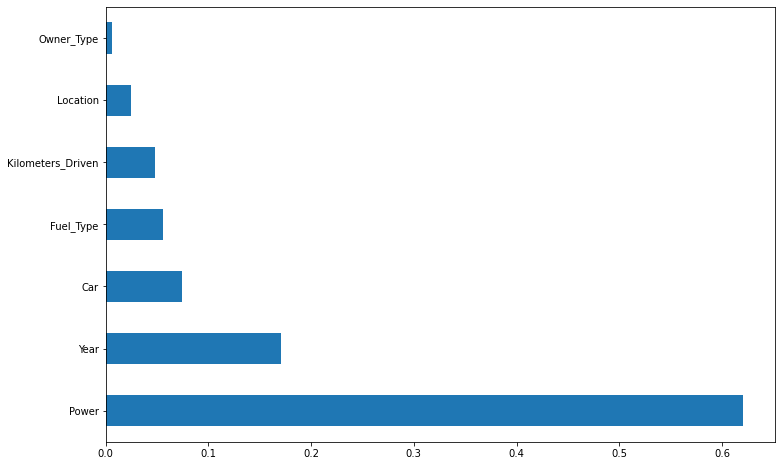

In [132]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Power is very much imp features followed by Year and Car 

## Residual Error 

In [133]:
residual=Y_test-y_pred
print(residual)

3665    0.1704
2604    3.0752
1551   -0.0123
2313   -1.1638
2375    0.2883
         ...  
5150   -0.7558
2183   -1.3863
1674    0.1721
192     0.4188
2761   -5.5392
Name: Price, Length: 1684, dtype: float64


In [134]:
#Create a Dictionary:
dic={'Y_pred' :y_pred,'residual' : residual}
df1=pd.DataFrame(dic)
df1.head()

,Y_pred,residual
3665,3.2396,0.1704
2604,31.9248,3.0752
1551,2.3623,-0.0123
2313,4.4138,-1.1638
2375,1.7617,0.2883


In [135]:
df1['Y_Test']=Y_test

## Scatter Plot -->  pred vs Residual error

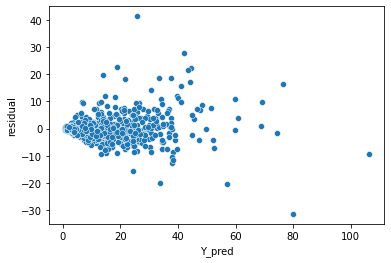

In [136]:
sns.scatterplot(data=df1,x='Y_pred',y='residual')
plt.show()

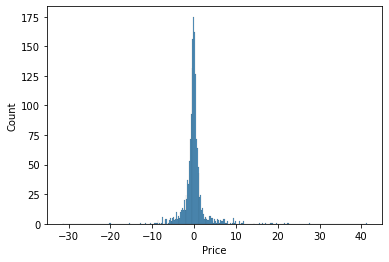

In [137]:
sns.histplot(residual)
plt.show()

In [138]:
#Find Skewness:
residual.skew()

2.2954901592629393

## Scatter Plot  --> Y_pred vs Y_test

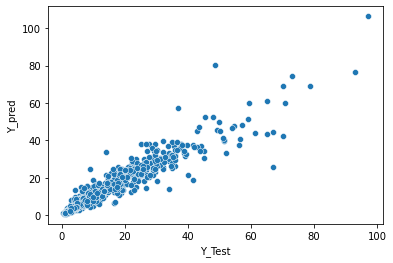

In [139]:
sns.scatterplot(data=df1,y='Y_pred',x='Y_Test')
plt.show()

### As seen from above  accuracy of model is very good its prdict values almost nearest to actual values 

In [140]:
#Create a Dictionary:
dic={'Y_pred' :y_pred,'residual' : residual}
df1=pd.DataFrame(dic)
df1.head()

,Y_pred,residual
3665,3.2396,0.1704
2604,31.9248,3.0752
1551,2.3623,-0.0123
2313,4.4138,-1.1638
2375,1.7617,0.2883


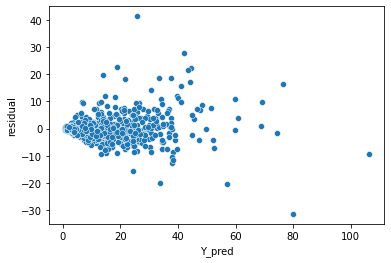

In [141]:
sns.scatterplot(data=df1,x='Y_pred',y='residual')
plt.show()

## Cross Validation Score

In [142]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

In [143]:
mean_score = cross_val_score(rf, X, Y, cv=5)

In [144]:
mean_score.mean()

0.8955116231669775

- <h3>After cross validation model is giving good accuracy on average of 90%</h3>
- <h3>so we can proceed with RandomForestRegressor Algorithms</h3>
- <h3>As seen from above Power is very much Important factor which domiates more to determine selling price of car</h3>
- <h3>Power of car is ultimately depends upon car model because price difference of BMW and Honda car with same model year 2015 is very very high and which is depend on power</h3>
- <h3>2nd imporatnt factor is Model year as car become old and old its value and price goes down</h3>
- <h3>Price of Diesel car is slight higher than petrol car</h3>
- <h3>More KM driven price get reduce but its not dominate more</h3>